In [1]:
%matplotlib inline

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from skimage import transform as tf
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

import cv2

from LFWDataset import LFWDataset
from SiameseNet import SiameseNet

In [10]:
def data_aug(im, augmentation_prob=0.7):
    #parameters
    #  im - PIL image
    #  augmentation_prob - probability of augmentation
    #return
    #  randomly applied data augmentation
    
    
    if np.random.random_sample() < augmentation_prob:
        x = np.random.random_sample()
#         print(x)
        if x < 0.25:
#             print('lr')
            #left-right flip
            return Image.fromarray(np.fliplr(np.array(im)))
        elif x < 0.5:
#             print('rotate')
            return Image.fromarray((255* tf.rotate(np.array(im), np.random.randint(-30, 31), mode='constant')).astype('uint8'))
            #rotation of -30 to 30 degrees
        elif x < 0.75:
#             print('translate')
            #translate -10 to 10 pixels
            translate = tf.AffineTransform(translation=
                                           (np.random.randint(-10, 11), np.random.randint(-10, 11))
                                          )
            return Image.fromarray((255*tf.warp(im, translate, mode='constant')).astype('uint8'))
        else:
#             print('scale')
            #scaling between ratio 0.7 and 1.3
            ratio = 0.7+0.6*np.random.random()
            scaled = tf.rescale(np.array(im), ratio, mode='constant')
            s, _,_ = scaled.shape

            if ratio >= 1:
                left = s//2 - 125
                right = s//2 + 125
                bottom = s//2 - 125
                top = s//2 + 125
                scaled = scaled[left:right, bottom:top]
            else:
                pad = (250-s)//2
                scaled = np.lib.pad(scaled, ((pad, pad), (pad, pad), (0, 0)), 'constant')
                scaled = tf.resize(scaled, (250,250), mode='constant')
                
            return Image.fromarray((255*scaled).astype('uint8'))
    else:
#         print('do nothing')
        return im

In [11]:
%matplotlib inline
def show(img, filename=None, save=False):
    npimg = img.numpy()
    plt.axis("off")
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.show()
    
    if save and filename is not None:
        plt.savefig(filename)

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

In [12]:
trainset = LFWDataset(train=True,
                      transform=transforms.Compose([data_aug, transforms.Scale((128,128)),
                                                                      transforms.ToTensor()
                                                                      ]))
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)




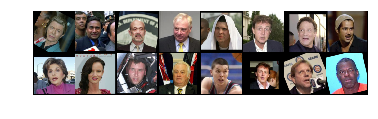

[0 0 0 1 1 1 0 0]


Process Process-6:
Process Process-5:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self.run()
  File "/home/zdavidli/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/home/zdavidli/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
    r = index_queue.get()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 378, in get
    return recv()
    racquire()
Key

In [13]:
vis_dataloader = DataLoader(trainset,
                        shuffle=True,
                        num_workers=2,
                        batch_size=8)
dataiter = iter(vis_dataloader)

example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)

show(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())

In [14]:
net = SiameseNet().cuda()
criterion = nn.BCELoss()
learning_rate = 1e-6
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [15]:
print(net)

SiameseNet (
  (cnn): Sequential (
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU (inplace)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (3): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU (inplace)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (7): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (11): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU (inplace)
    (14): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
  )
  (fc1): Sequential (
    (0): Linear (131072 -> 1024)
    (1): ReLU (inplace)
    (2): BatchNorm2d(1024, 

In [16]:
counter = []
loss_history = [] 
iteration_number= 0
epochs = 30

torch.Size([16, 3, 128, 128])


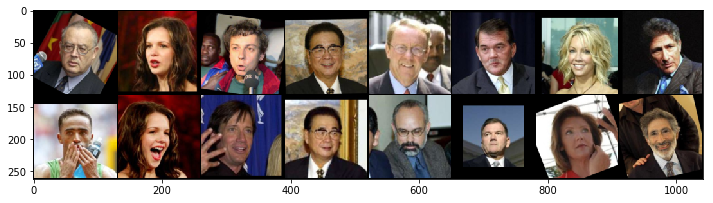

Process Process-8:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process Process-7:
Traceback (most recent call last):
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/zdavidli/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    self._target(*self._args, **self._kwargs)
    r = index_queue.get()
  File "/home/zdavidli/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
    racquire()
    r = index_queue.get()
KeyboardInterrupt
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 378, in get
   

KeyboardInterrupt: 

In [17]:
for epoch in range(epochs):
    for i, data in enumerate(trainloader,0):
        img0, img1 , label = data
        if i==0:
            concat = torch.cat((img0, img1), 0)
            print(concat.shape)
            grid = torchvision.utils.make_grid(concat)
            im = transforms.ToPILImage()(grid)
            plt.figure(figsize=(12,15))
            plt.imshow(im)
            plt.show()
#             im.save("output.png")
        img0, img1 , label = Variable(img0).cuda(), Variable(img1).cuda() , Variable(label).cuda()
        output = net(img0,img1)
        label = label.unsqueeze(1).float()
        if i==0:
            print(output, label)
        
        optimizer.zero_grad()
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss.data[0]))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss.data[0])

In [ ]:
show_plot(counter,loss_history)

In [ ]:
torch.save(net.state_dict(), "model")

In [ ]:
testset = LFWDataset(test=True,
                     transform=transforms.Compose([transforms.Scale((128, 128)),
                                                                      transforms.ToTensor()
                                                                      ]))
testloader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [ ]:
net.load_state_dict(torch.load('p1ai'))

In [ ]:
right=wrong=0.

for i, data in enumerate(testloader,0):
    img0, img1, label = data    
    img0, img1, label = Variable(img0).cuda(), Variable(img1).cuda(), Variable(label).cuda()
    
    output = net(img0,img1)
    for x,y in zip(output, label):
#         print(x.data[0], y.data[0])
        if (x.data[0]<=0.5 and y.data[0]==0) or (x.data[0]>0.5 and y.data[0]==1):
            right+=1
        else:
            wrong+=1
            

In [ ]:
#     print(right, wrong)
testacc = right/(right+wrong)
print("Accuracy on test set: {:.2f}".format(testacc))

In [ ]:
right=wrong=0.

for i, data in enumerate(trainloader,0):
    img0, img1, label = data    
    img0, img1, label = Variable(img0).cuda(), Variable(img1).cuda(), Variable(label).cuda()
    
    output = net(img0,img1)
    for x,y in zip(output, label):
#         print(x.data[0], y.data[0])
        if (x.data[0]<=0.5 and y.data[0]==0) or (x.data[0]>0.5 and y.data[0]==1):
            right+=1
        else:
            wrong+=1
            

In [ ]:
#     print(right, wrong)
trainacc = right/(right+wrong)
print("Accuracy on train set: {:.2f}".format(trainacc))

In [ ]:
class ContrastiveLoss(torch.nn.Module):
    """
    Contrastive loss function.
    Based on: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


        return loss_contrastive

In [ ]:
m = nn.Sigmoid()
loss = nn.BCELoss()
input = torch.autograd.Variable(torch.randn(3), requires_grad=True)
target = torch.autograd.Variable(torch.FloatTensor(3).random_(2))
print(input, target)
output = loss(m(input), target)
output.backward()

In [ ]:
from PIL import Image
im = Image.open("lfw/Taufik_Hidayat/Taufik_Hidayat_0001.jpg")

plt.imshow(im)

In [ ]:
plt.imshow(data_aug(im))